In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('covid_symptoms_severity_prediction.csv')
print("Размерность данных:", df.shape)

Размерность данных: (3000, 17)


In [4]:
df.head()

,age,gender,vaccination_status,fever,cough,fatigue,shortness_of_breath,loss_of_smell,headache,diabetes,hypertension,heart_disease,asthma,cancer,hospitalized,icu_admission,mortality
0,51,Male,Unvaccinated,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,92,Male,Fully Vaccinated,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,14,Male,Fully Vaccinated,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,71,Male,Fully Vaccinated,1,1,0,0,0,0,0,1,0,0,0,0,0,0
4,60,Male,Unvaccinated,0,1,1,1,1,0,1,1,1,0,0,1,1,0


In [5]:
print("\nСтолбцы:", df.columns.tolist())


Столбцы: ['age', 'gender', 'vaccination_status', 'fever', 'cough', 'fatigue', 'shortness_of_breath', 'loss_of_smell', 'headache', 'diabetes', 'hypertension', 'heart_disease', 'asthma', 'cancer', 'hospitalized', 'icu_admission', 'mortality']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  3000 non-null   int64 
 1   gender               3000 non-null   object
 2   vaccination_status   3000 non-null   object
 3   fever                3000 non-null   int64 
 4   cough                3000 non-null   int64 
 5   fatigue              3000 non-null   int64 
 6   shortness_of_breath  3000 non-null   int64 
 7   loss_of_smell        3000 non-null   int64 
 8   headache             3000 non-null   int64 
 9   diabetes             3000 non-null   int64 
 10  hypertension         3000 non-null   int64 
 11  heart_disease        3000 non-null   int64 
 12  asthma               3000 non-null   int64 
 13  cancer               3000 non-null   int64 
 14  hospitalized         3000 non-null   int64 
 15  icu_admission        3000 non-null   int64 
 16  mortal

In [8]:
import pandas as pd

data = {
    "Признак": [
        "age", "gender", "vaccination_status", "fever", "cough", "fatigue",
        "shortness_of_breath", "loss_of_smell", "headache", "diabetes",
        "hypertension", "heart_disease", "asthma", "cancer",
        "hospitalized", "icu_admission", "mortality"
    ],
    
    "Тип": [
        "Числовой", "Категориальный", "Категориальный", "Бинарный", "Бинарный", "Бинарный",
        "Бинарный", "Бинарный", "Бинарный", "Бинарный",
        "Бинарный", "Бинарный", "Бинарный", "Бинарный",
        "Бинарный", "Бинарный", "Бинарный (целевая)"
    ],
    
    "Описание": [
        "Возраст пациента",
        "Пол пациента",
        "Статус вакцинации",
        "Наличие лихорадки",
        "Наличие кашля",
        "Наличие усталости",
        "Одышка",
        "Потеря обоняния",
        "Головная боль",
        "Диабет",
        "Гипертония",
        "Заболевания сердца",
        "Астма",
        "Онкологические заболевания",
        "Госпитализирован ли пациент",
        "Поступил в реанимацию",
        "Смертность пациента"
    ],
    
    "Проблемы": [
        "—",
        "Требуется кодирование",
        "Требуется кодирование",
        "—", "—", "—",
        "—", "—", "—",
        "Дисбаланс классов возможен",
        "Дисбаланс классов возможен",
        "Дисбаланс классов возможен",
        "Редкие значения",
        "Редкие значения",
        "Коррелирует с тяжестью болезни",
        "Сильная связь с \"hospitalized\"",
        "Несбалансированная переменная"
    ],
    
    "Потенциал для Feature Engineering": [
        "Создание возрастных групп",
        "Кодировка (Label Encoding)",
        "Кодировка (Label Encoding)",
        "—", "—", "—",
        "—", "—", "—",
        "Объединение хронических болезней",
        "Объединение хронических болезней",
        "Объединение хронических болезней",
        "Создание признака \"chronic_disease_count\"",
        "Создание признака \"chronic_disease_count\"",
        "Признаки тяжести заболевания",
        "Признаки критического состояния",
        "—"
    ]
}

df_features = pd.DataFrame(data)

# Красивое оформление
styled_df = (
    df_features.style
        .set_properties(**{
            'background-color': '#f7f7f7',
            'border': '1px solid #ccc',
            'padding': '6px',
            'font-size': '14px'
        })
        .set_table_styles([
            {'selector': 'th', 
             'props': [('background-color', '#4a90e2'),
                       ('color', 'white'),
                       ('padding', '8px'),
                       ('font-size', '15px'),
                       ('text-align', 'center')]},
            {'selector': 'tr:nth-child(even)',
             'props': [('background-color', '#e9f0fa')]},
            {'selector': 'tr:nth-child(odd)',
             'props': [('background-color', '#ffffff')]}
        ])
        .hide(axis='index')
)

styled_df


Признак,Тип,Описание,Проблемы,Потенциал для Feature Engineering
age,Числовой,Возраст пациента,—,Создание возрастных групп
gender,Категориальный,Пол пациента,Требуется кодирование,Кодировка (Label Encoding)
vaccination_status,Категориальный,Статус вакцинации,Требуется кодирование,Кодировка (Label Encoding)
fever,Бинарный,Наличие лихорадки,—,—
cough,Бинарный,Наличие кашля,—,—
fatigue,Бинарный,Наличие усталости,—,—
shortness_of_breath,Бинарный,Одышка,—,—
loss_of_smell,Бинарный,Потеря обоняния,—,—
headache,Бинарный,Головная боль,—,—
diabetes,Бинарный,Диабет,Дисбаланс классов возможен,Объединение хронических болезней


In [9]:
print("Пропущенные значения")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
pd.DataFrame({'Количество пропусков': missing_data,
             'Процент пропусков': missing_percent.round(2)})

Пропущенные значения


,Количество пропусков,Процент пропусков
age,0,0.0
gender,0,0.0
vaccination_status,0,0.0
fever,0,0.0
cough,0,0.0
fatigue,0,0.0
shortness_of_breath,0,0.0
loss_of_smell,0,0.0
headache,0,0.0
diabetes,0,0.0


In [13]:
print('Доля умерших по вакцинации и полу:')
pivot = pd.pivot_table(
    df,
    values='mortality',
    index=['vaccination_status'],
    columns=['gender'],
    aggfunc='mean',
    fill_value=0
)
pivot.round(4)

Доля умерших по вакцинации и полу:


gender,Female,Male,Other
vaccination_status,,,
Booster Dose,0.0045,0.0048,0.0667
Fully Vaccinated,0.0266,0.0209,0.0238
Partially Vaccinated,0.0581,0.0490,0.0645
Unvaccinated,0.1084,0.0877,0.1200


In [15]:
#P(умер) - общая вероятность умереть
P_died = df['mortality'].mean()
print(f"P(died) = {P_died:.3f}")

P(died) = 0.044


In [20]:
#P(вакцина) - вероятность быть вакцинированным разными способами
for vaccine in sorted(df['vaccination_status'].unique()):
    P_vaccine = (df['vaccination_status']==vaccine).mean()
    print(f"P(vaccine={vaccine}) = {P_vaccine:.3f}")

P(vaccine=Booster Dose) = 0.148
P(vaccine=Fully Vaccinated) = 0.406
P(vaccine=Partially Vaccinated) = 0.247
P(vaccine=Unvaccinated) = 0.199


In [23]:
#P(пол) - вероятность быть мужчиной, женщиной или чем-то ещё, что есть в этой статистике
for gender in df['gender'].unique():
    P_gender = (df['gender']==gender).mean()
    print(f"P(gender={gender}) = {P_gender:.3f}")

P(gender=Male) = 0.479
P(gender=Female) = 0.484
P(gender=Other) = 0.038


# Задача 1
Какова вероятность умереть, если пациент был женщиной? 


$$
P_{\text{Female}}(Died) = \frac{P(Died \cdot Female)}{P(Female)}
$$

In [35]:
# Способ 1: Вручную по формуле
women = df[df['gender']=='Female']
P_female = (df['gender']=='Female').mean()
P_died_and_female = ((df['mortality']==1) & (df['gender']=='Female')).mean()

P_died_if_female = P_died_and_female / P_female
print(f"P(died | female), рассчитанная вручную: {P_died_if_female:.3f}")

P(died | female), рассчитанная вручную: 0.047


In [36]:
# Способ 2: отфильтровать датафрейм
women = df[df['gender']=='Female']
P_P_died_if_female = women['mortality'].mean()
print(f"P(died | female), рассчитанная через фильтр: {P_P_died_if_female:.3f}")

P(died | female), рассчитанная через фильтр: 0.047


# Задача 2
Какова вероятность умереть, если пациент был мужчиной? 

$$
P_{\text{Male}}(Died) = \frac{P(Died \cdot Male)}{P(Male)}
$$

In [40]:
# Способ 1: Вручную по формуле
men = df[df['gender']=='Male']
P_male = (df['gender']=='Male').mean()
P_died_and_male = ((df['mortality']==1) & (df['gender']=='Male')).mean()

P_died_if_male = P_died_and_male / P_male
print(f"P(died | male), рассчитанная вручную: {P_died_if_male:.3f}")

P(died | male), рассчитанная вручную: 0.039


In [43]:
# Способ 2: отфильтровать датафрейм
men = df[df['gender']=='Male']
P_P_died_if_male = men['mortality'].mean()
print(f"P(died | male), рассчитанная через фильтр: {P_P_died_if_male:.3f}")

P(died | male), рассчитанная через фильтр: 0.039


# Задача 2
Какова вероятность умереть, если пациент был не вакцинирован? 

$$
P_{\text{Unvaccinated}}(Died) = \frac{P(Died \cdot Unvaccinated)}{P(Unvaccinated)}
$$

In [45]:
# Способ 1: Вручную по формуле
men = df[df['vaccination_status']=='Unvaccinated']
P_unvaccinated = (df['vaccination_status']=='Unvaccinated').mean()
P_died_and_unvaccinated = ((df['mortality']==1) & (df['vaccination_status']=='Unvaccinated')).mean()

P_died_if_unvaccinated = P_died_and_unvaccinated / P_unvaccinated
print(f"P(died | unvaccinated), рассчитанная вручную: {P_died_if_unvaccinated:.3f}")

P(died | unvaccinated), рассчитанная вручную: 0.099


In [47]:
# Способ 2: отфильтровать датафрейм
unvaccinated = df[df['vaccination_status']=='Unvaccinated']
P_P_died_if_unvaccinated = unvaccinated['mortality'].mean()
print(f"P(died | unvaccinated), рассчитанная через фильтр: {P_P_died_if_unvaccinated:.3f}")

P(died | unvaccinated), рассчитанная через фильтр: 0.099


In [48]:
def conditional_probability(df, condition_col, condition_val, target_col, target_val=1):
    subset = df[df[condition_col]==condition_val]
    if len(subset)==0:
        return 0
    return (subset[target_col]==target_val).mean()

In [55]:
print("УСЛОВНЫЕ ВЕРОЯТНОСТИ СМЕРТИ:")
print("=" * 50)

# По полу
print("\nПо полу:")
for gender in df['gender'].unique():
    prob = conditional_probability(df, 'gender', gender, 'mortality')
    print(f" P(Died|Gender={gender}) = {prob:.3f}")
#
# По классу
print("\nПо вакцинации:")
for vaccine in sorted(df['vaccination_status'].unique()):
    prob = conditional_probability(df, 'vaccination_status', vaccine, 'mortality')
    print(f" P(Died|Vaccination={vaccine}) = {prob:.3f}")
#
# По порту посадки
print("\nПо наличию диабета:")
for diabetes in sorted(df['diabetes'].unique()):
    prob = conditional_probability(df, 'diabetes', diabetes, 'mortality')
    print(f"P(Died|Diabetes={diabetes}) = {prob:.3f}")
#

УСЛОВНЫЕ ВЕРОЯТНОСТИ СМЕРТИ:

По полу:
 P(Died|Gender=Male) = 0.039
 P(Died|Gender=Female) = 0.047
 P(Died|Gender=Other) = 0.062

По вакцинации:
 P(Died|Vaccination=Booster Dose) = 0.007
 P(Died|Vaccination=Fully Vaccinated) = 0.024
 P(Died|Vaccination=Partially Vaccinated) = 0.054
 P(Died|Vaccination=Unvaccinated) = 0.099

По наличию диабета:
P(Died|Diabetes=0) = 0.040
P(Died|Diabetes=1) = 0.061


In [62]:
print("ФОРМУЛА ПОЛНОЙ ВЕРОЯТНОСТИ:")
print("P(Died) = Σ P(Died|vaccine=i) * P(vaccine=i)")
print("=" * 50)

total_prob = 0
prob_details = []
for vaccine in sorted(df['vaccination_status'].unique()):
    # P(vaccine = i)
    P_vaccine = (df['vaccination_status']==vaccine).mean()
    # P(Died | vaccine = i)
    P_died_given_vaccine = conditional_probability(df, 'vaccination_status',
    vaccine, 'mortality')

    # Вклад этой вакцины
    contribution = P_died_given_vaccine * P_vaccine
    total_prob += contribution

    prob_details.append({
    'vaccine': vaccine,
    'P(vaccine)': P_vaccine,
    'P(Died|vaccine)': P_died_given_vaccine,
    'Вклад': contribution
    })
# Создаем DataFrame для наглядности
prob_df = pd.DataFrame(prob_details)
print(prob_df.round(3))

print(f"\nОбщая вероятность смерти, рассчитанная по формуле полной вероятности: {total_prob:.3f}")
print(f"Общая вероятность смерти, рассчитанная напрямую из данных: {df['mortality'].mean():.3f}")

ФОРМУЛА ПОЛНОЙ ВЕРОЯТНОСТИ:
P(Died) = Σ P(Died|vaccine=i) * P(vaccine=i)
                vaccine  P(vaccine)  P(Died|vaccine)  Вклад
0          Booster Dose       0.148            0.007  0.001
1      Fully Vaccinated       0.406            0.024  0.010
2  Partially Vaccinated       0.247            0.054  0.013
3          Unvaccinated       0.199            0.099  0.020

Общая вероятность смерти, рассчитанная по формуле полной вероятности: 0.044
Общая вероятность смерти, рассчитанная напрямую из данных: 0.044


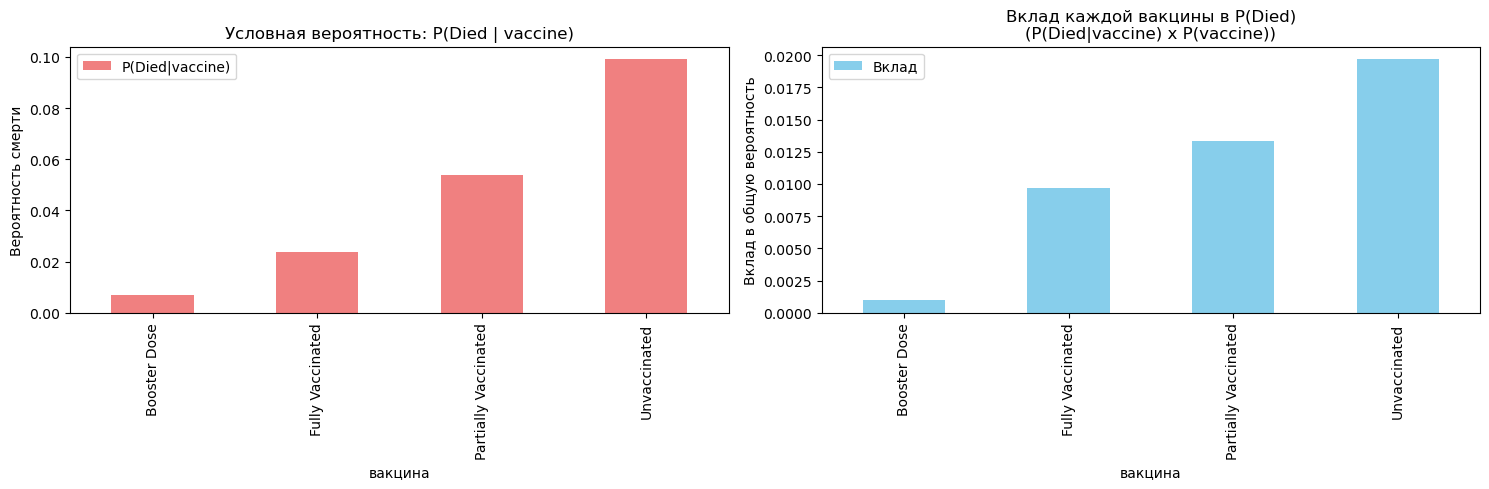

In [67]:
# Визуализируем вклад классов
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Левая часть: P(Died | vaccine)
prob_df.plot(x='vaccine', y='P(Died|vaccine)', kind='bar',
    ax=ax1, color='lightcoral')
ax1.set_title('Условная вероятность: P(Died | vaccine)')
ax1.set_ylabel('Вероятность смерти')
ax1.set_xlabel('вакцина')

# Правая часть: Вклад в общую вероятность
prob_df.plot(x='vaccine', y='Вклад', kind='bar', ax=ax2, color='skyblue')
ax2.set_title('Вклад каждой вакцины в P(Died)\n(P(Died|vaccine) x P(vaccine))')
ax2.set_ylabel('Вклад в общую вероятность')
ax2.set_xlabel('вакцина')

plt.tight_layout()
plt.show()

# Задача на формулу Байеса
Пациент умер. Информации о его статусе вакцинации у нас нет, но мы хотим понять, каким был этот статус. 

In [73]:
print("ТЕОРЕМА БАЙЕСА:")
print("P(Vaccine | died) = [P(Died | vaccine) x P(vaccine)] / P(died)")
print("=" * 50)

P_S = df['mortality'].mean()

bayes_results = []

for vaccine in sorted(df['vaccination_status'].unique()):
    P_A = (df['vaccination_status']==vaccine).mean()
    P_B_given_A = conditional_probability(df, 'vaccination_status', vaccine, 'mortality')

    # Применяем теорему Байеса
    P_A_given_B = (P_B_given_A * P_A) / P_S

    bayes_results.append({
    'vaccine': vaccine,
    'P(vaccine)': P_A,
    'P(Died|vaccine)': P_B_given_A,
    'P(Vaccine|died)': P_A_given_B
    })

# Создаем DataFrame
bayes_df = pd.DataFrame(bayes_results)
print("Результаты применения теоремы Байеса:")
print(bayes_df.round(3))

ТЕОРЕМА БАЙЕСА:
P(Vaccine | died) = [P(Died | vaccine) x P(vaccine)] / P(died)
Результаты применения теоремы Байеса:
                vaccine  P(vaccine)  P(Died|vaccine)  P(Vaccine|died)
0          Booster Dose       0.148            0.007            0.023
1      Fully Vaccinated       0.406            0.024            0.221
2  Partially Vaccinated       0.247            0.054            0.305
3          Unvaccinated       0.199            0.099            0.450


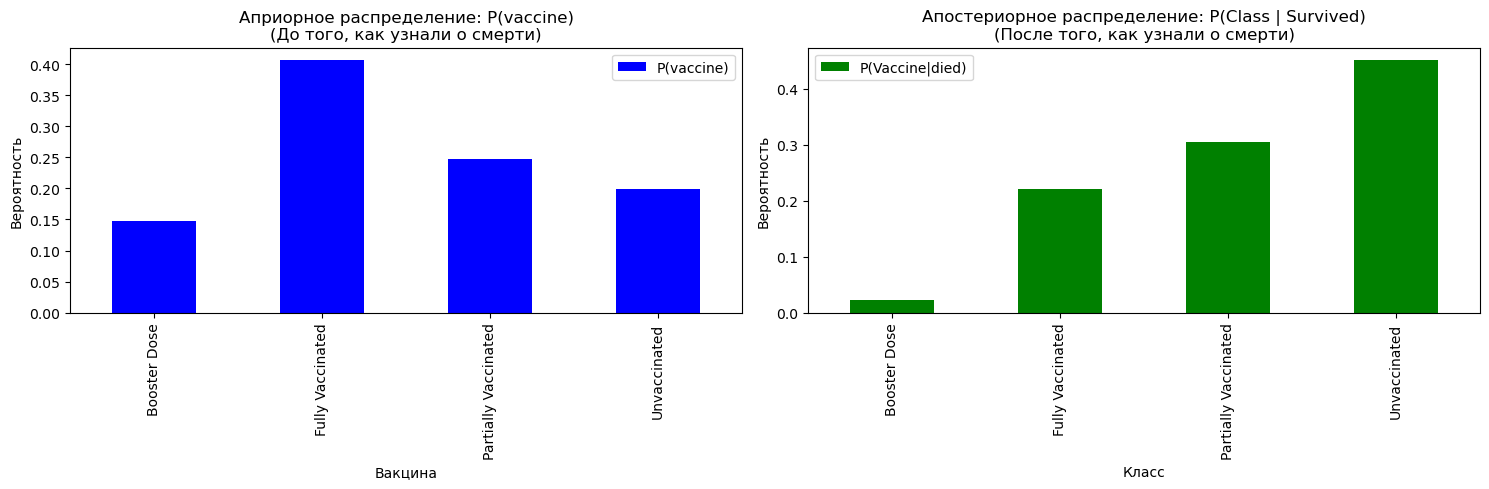

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Априорное распределение
bayes_df.plot(x='vaccine', y='P(vaccine)', kind='bar', ax=ax1, color='blue')
ax1.set_title('Априорное распределение: P(vaccine)\n(До того, как узнали о смерти)')
ax1.set_ylabel('Вероятность')
ax1.set_xlabel('Вакцина')

# Апостериорное распределение
bayes_df.plot(x='vaccine', y='P(Vaccine|died)', kind='bar', ax=ax2, color='green')
ax2.set_title('Апостериорное распределение: P(Class | Survived)\n(После того, как узнали о смерти)')
ax2.set_ylabel('Вероятность')
ax2.set_xlabel('Класс')

plt.tight_layout()
plt.show()